In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSReNRzjhxq3oT03rISUM7-5UcNf_flKxO0AjFGcPbx3HapArOSyucjKEszeNDWUX7Qymiwm1Bqt73A/pub?gid=53846645&single=true&output=csv')

In [3]:
df.head()

,review,sentiment
0,But this movie was a bore. The history part wa...,0
1,Divorced lawyer Rick Magruder (Branagh) stumbl...,0
2,Man about the house is a true situation comedy...,1
3,"As a film buff, I obviously had read all the e...",1
4,That's about the only redeeming quality in a m...,0


In [4]:
X = df['review']

In [5]:
y = df['sentiment']

In [6]:
df.isnull().sum()

,0
review,0
sentiment,0


In [7]:
message = X.copy()

In [8]:
import spacy

**Language model**

In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
corpus = []
empty_count = 0
import re

**Text Preprocessing**

In [11]:
for review in message:
  review = re.sub(r'<[^>]+>', ' ', review)
  review = re.sub('[^a-zA-Z]', ' ' , review) # Only take alphanumaric text
  review = review.lower() # always lower case
  review = nlp(review) # spacy object
  review = [token.lemma_ for token in review if not token.is_stop] #TOkenization lemmatization and removing stop word
  review = ' '.join(review)
  corpus.append(review) # add to courpus


In [ ]:
print(empty_count)

0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Implemnting TF-IDF on courpus**

In [13]:
tv = TfidfVectorizer(max_features=50000) #Declearing TF-IDF
vector = tv.fit_transform(corpus) #TF-IDF of courpus

In [14]:
vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 412492 stored elements and shape (5000, 30730)>

In [15]:
y = df.iloc[:, 1].values

In [16]:
vector=vector.toarray()

In [17]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
print("Any nonzero?", np.any(vector != 0))
print("Number of nonzero values:", np.count_nonzero(vector))
print("Example row nonzero count:", np.count_nonzero(vector[0]))

Any nonzero? True
Number of nonzero values: 412492
Example row nonzero count: 41


In [19]:
row_idx = 0
nonzero_indices = np.nonzero(vector[row_idx])[0]
print("Indices:", nonzero_indices)
print("Values:", vector[row_idx, nonzero_indices])

Indices: [  235  1031  2237  3094  3278  3967  4368  4608  5195  5623  6608  9853
 11956 12224 12590 12593 12977 13867 14321 14375 14463 15302 18095 18247
 18248 19066 19549 19626 21778 22384 22623 23688 24488 24866 25221 25290
 26369 26515 27930 30247 30282]
Values: [0.20148759 0.11366718 0.18816505 0.12811272 0.14671717 0.09673873
 0.05481098 0.21206228 0.12562699 0.14725493 0.16760177 0.09998737
 0.21956514 0.09507023 0.27869542 0.10964687 0.17590717 0.08562148
 0.20148759 0.16426783 0.09946048 0.0974533  0.07501165 0.08650565
 0.35313744 0.1562485  0.14893812 0.20148759 0.1441831  0.15404321
 0.0970539  0.0611377  0.13855733 0.18816505 0.20658621 0.11896745
 0.19704262 0.13144667 0.06978534 0.06673829 0.09228567]


In [20]:
X = vector


**Splitting Dataset**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

**Initiating Naive Bayes**

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gnb = GaussianNB() #initiating Gaussian naive Bayes

**Train Dataset Into Naive Bayes**

In [24]:
gnbmModel = gnb.fit(X_train,y_train)

**Prediction of Naive Bayes**

In [25]:
gnb_pred = gnbmModel.predict(X_test)

**Initiating Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
DT = DecisionTreeClassifier() #initiate Decietion Tree

**Train Dataset into Decision Tree**

In [28]:
DTC = DT.fit(X_train,y_train)

**Prediction of Decition Tree**

In [29]:
DTC_pred = DTC.predict(X_test)

**Initiating Logisitic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR = LogisticRegression() #initiate Logistic Regression

**Train Daraset Into Logistic Regression**

In [32]:
LRModel = LR.fit(X_train,y_train)

**Prediction of Logistic Regression**

In [33]:
LRPredict = LRModel.predict(X_test)

**Confusion Matrix for Naive Bayes**

In [34]:
from sklearn.metrics import confusion_matrix
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

print("Naieve Bayes Confusion Matrix:")
print(gnb_conf_matrix)

Naieve Bayes Confusion Matrix:
[[327 168]
 [175 330]]


**Confusion Matrix for Decision Tree**

In [35]:
DT_conf_Matrix = confusion_matrix(y_test, DTC_pred)

print("Decision Tree Confusion Matrix:")
print(DT_conf_Matrix)

Decision Tree Confusion Matrix:
[[340 155]
 [138 367]]


**Confusion Matrix for Logistic Regression**

In [36]:
LR_conf_Matrix = confusion_matrix(y_test, LRPredict)

print("Logistic Regression Confusion Matrix:")
print(LR_conf_Matrix)

Logistic Regression Confusion Matrix:
[[417  78]
 [ 52 453]]


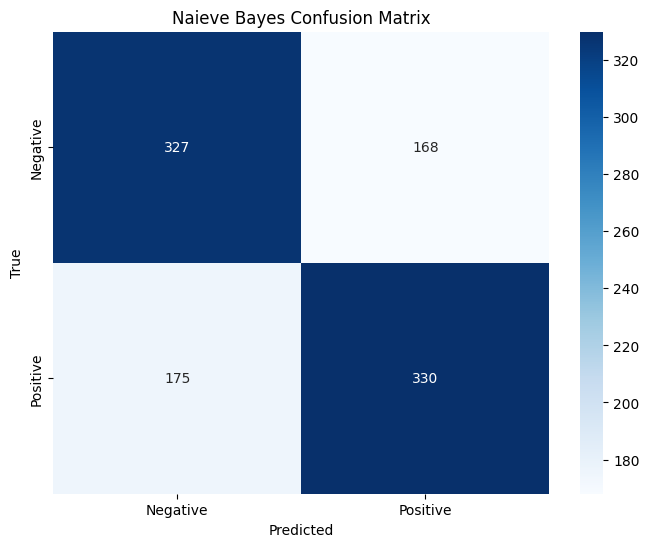

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naieve Bayes Confusion Matrix")
plt.show()

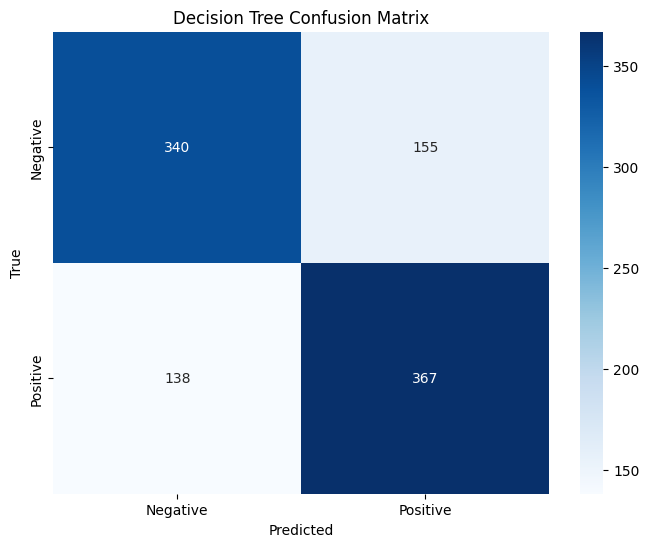

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(DT_conf_Matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")
plt.show()

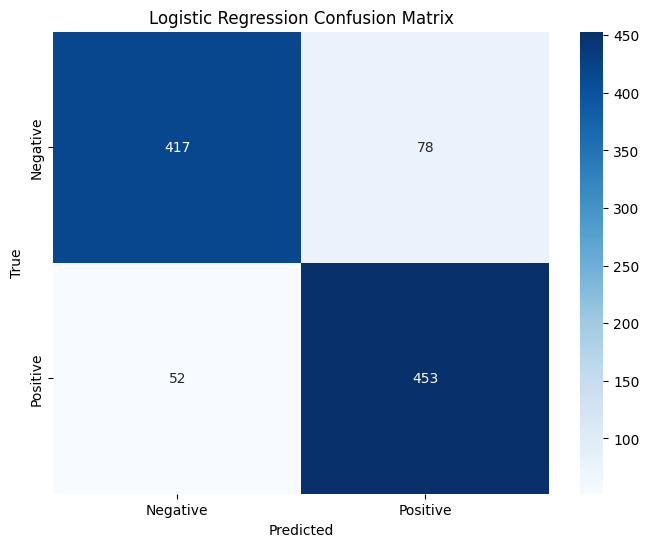

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(LR_conf_Matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

**Accuracy, Recall, F1-Score for Naive Bayes**

In [41]:
Gnb_accuracy = accuracy_score(y_test, gnb_pred)
Gnb_recall = recall_score(y_test, gnb_pred)
Gnb_f1 = f1_score(y_test, gnb_pred)

In [42]:
print(Gnb_accuracy)
print(Gnb_recall)
print(Gnb_f1)

0.657
0.6534653465346535
0.6580259222333001


**Accuracy, Recall, F1-Score for Decision Tree**

In [43]:
DT_accuracy = accuracy_score(y_test, DTC_pred)
DT_recall = recall_score(y_test, DTC_pred)
DT_f1 = f1_score(y_test, DTC_pred)

In [44]:
print(DT_accuracy)
print(DT_recall)
print(DT_f1)

0.707
0.7267326732673267
0.7147030185004869


**Accuracy, Recall, F1-Score for Logistic Regression**

In [45]:
LR_accuracy = accuracy_score(y_test, LRPredict)
LR_recall = recall_score(y_test, LRPredict)
LR_f1 = f1_score(y_test, LRPredict)

In [46]:
print(LR_accuracy)
print(LR_recall)
print(LR_f1)

0.87
0.897029702970297
0.8745173745173745


**Classification of a test Instance**

In [47]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.20, random_state=42
)

In [48]:
original_text = df.loc[idx_test[0], 'review']
original_label = df.loc[idx_test[0], 'sentiment']
print("Review Instance: ",original_text)
print("Review Label: ", original_label)
processed_text = corpus[idx_test[0]]  # processed text from corpus
print("Processed text:", processed_text)


GnbInstance = gnbmModel.predict(X_test[0].reshape(1, -1))
DTInstance = DTC.predict(X_test[0].reshape(1, -1))
LRInstance = LRModel.predict(X_test[0].reshape(1, -1))


print("Naieve Bayes Prediction: ",GnbInstance)
print("Decision Tree Prediction: ",DTInstance)
print("Logistic Regression Prediction: ",LRInstance)




Review Instance:  And here's yet another piece of evidence to claim that we should all worship the Italian giallo and acknowledge it to be the absolute most unique sub genre in horror. Emilio Miraglia's "The Red Queen Kills Seven Times" is a totally mesmerizing wholesome of original plotting, stylish production values, enchanting music, great acting talents and inventively gory murder sequences. It's a fabulous giallo (released in the golden year 1972) that belongs in the top-five of every fan of Italian cinema. The storyline doesn't just introduce your average black-gloved & sexually frustrated killer, but blends good old-fashioned revenge motives with the macabre myth of the murderous "Red Queen". At young age, their grandfather tells the constantly fighting siblings Kitty and Evelyn about an uncanny lady who, once every 100 years on April 6th, kills seven people of which her sister is the inevitable last victim. Fourteen years later, Kitty has become the successful choreographer of 

In [50]:
import joblib
joblib.dump(gnbmModel, "Naive_Bayes_model.pkl")
joblib.dump(DTC, "Decision_Tree_model.pkl")
joblib.dump(LRModel, "Logistic_Regression_model.pkl")

['Logistic_Regression_model.pkl']